In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AppleStore.csv")
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
df.tail()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1


In [4]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [5]:
df = df.drop("Unnamed: 0", axis = 1)

In [6]:
df = df.drop("currency", axis = 1)

In [7]:
df = df.drop("vpp_lic", axis = 1)

In [8]:
df = df.drop("sup_devices.num", axis = 1)

In [9]:
df = df.drop("ipadSc_urls.num", axis = 1)

In [10]:
df = df.drop("lang.num", axis = 1)

In [11]:
df["cont_rating"] = df["cont_rating"].replace({"\+":""}, regex=True)

In [12]:
df.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference


# Genres Count & List

In [13]:
print("Number of Genre Applications -- {}".format(df["prime_genre"].value_counts().count()))

Number of Genre Applications -- 23


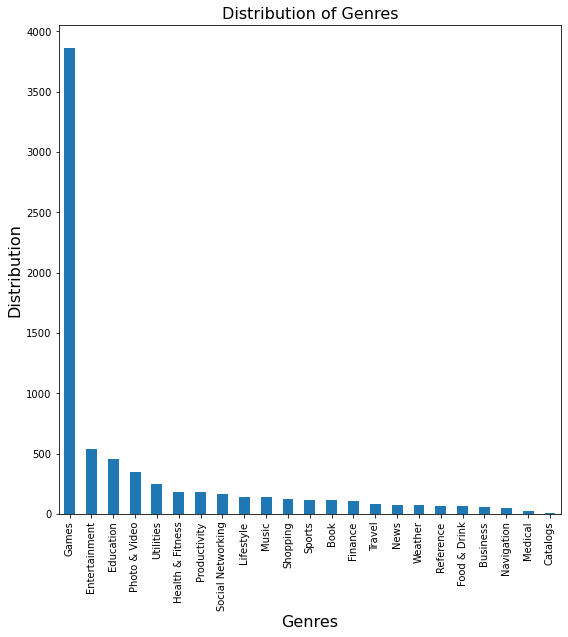

In [14]:
font = {'family': 'sans-serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 16,
        }

plt.title("Distribution of Genres", font)
plt.xlabel("Genres", fontdict=font)
plt.ylabel("Distribution", fontdict=font)
_ = df["prime_genre"].value_counts().plot(kind = "bar", figsize=(9,9))

In [15]:
print("Total Genres count -- {}".format(df["prime_genre"].value_counts().nunique()))
genre_count = df["prime_genre"].value_counts()
genre_count

Total Genres count -- 23


Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

# Content Rating Distribution

In [16]:
print("Distribution of Age Specific Applications are: \n {}".format(df["cont_rating"].value_counts()))

Distribution of Age Specific Applications are: 
 4     4433
12    1155
9      987
17     622
Name: cont_rating, dtype: int64


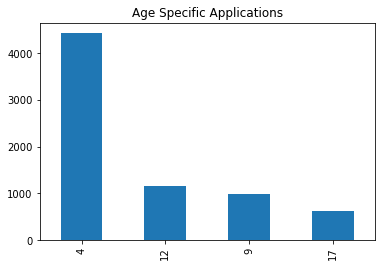

In [17]:
_ = df["cont_rating"].value_counts().plot(kind = "bar", title = "Age Specific Applications")

# Genres with Highest User Rating

In [18]:
print("Count of Applications with Highest User Ratings -- {}\n".format(df["prime_genre"][df["user_rating_ver"] == df["user_rating_ver"].max()].nunique()))

Count of Applications with Highest User Ratings -- 23



In [19]:
arr1 = df["prime_genre"][df["user_rating"] == df["user_rating"].max()].unique()

highest_user_rating_genres = pd.DataFrame(arr1, columns=["Top Rates Genres"], index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
highest_user_rating_genres

,Top Rates Genres
1,Games
2,Business
3,Education
4,Photo & Video
5,Utilities
6,Shopping
7,News
8,Health & Fitness
9,Productivity
10,Food & Drink


In [20]:
df.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference


In [21]:
df1 = df.copy()
df1.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference


# Categorizing Apps into Free & Paid

In [22]:
df1["Free/Paid Apps"] = np.where(df1["price"] == 0.00, "Free App", "Paid App")

In [23]:
print("Count of Free and Paid Apps \n {} \n\n".format(df1["Free/Paid Apps"].value_counts()))
print("Total Apps are {}".format(df1["Free/Paid Apps"].value_counts().sum()))

Count of Free and Paid Apps 
 Free App    4056
Paid App    3141
Name: Free/Paid Apps, dtype: int64 


Total Apps are 7197


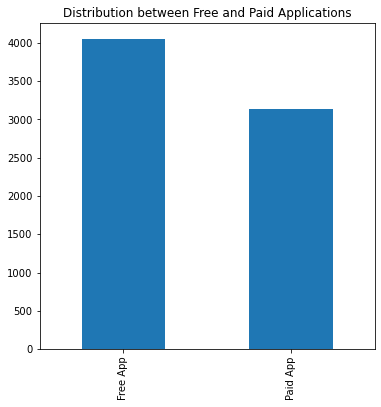

In [24]:
_ = df1["Free/Paid Apps"].value_counts().plot(kind = "bar", figsize = (6,6), title = "Distribution between Free and Paid Applications")

In [59]:
number_of_rating_counts = df1.groupby("Free/Paid Apps").sum()
number_of_rating_counts

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
Free/Paid Apps,,,,,,,
Free App,3647012126615,600027200052,0.00,80105208,2309490,13696.0,12411.0
Paid App,2564941662044,833143464127,12423.59,12685045,1003821,11687.5,11005.0


In [60]:
df1.groupby("Free/Paid Apps").mean()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
Free/Paid Apps,,,,,,,
Free App,8.991647e+08,1.479357e+08,0.000000,19749.804734,569.400888,3.376726,3.059911
Paid App,8.166003e+08,2.652478e+08,3.955298,4038.537090,319.586437,3.720949,3.503661


# Applications with the Highest Rating & Highest Rating Count

In [25]:
df1.head(3)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Free/Paid Apps
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games,Paid App
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,Free App
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,Free App


In [26]:
df1_highest = df1[["track_name","prime_genre","rating_count_ver"]][df1["user_rating_ver"] > 4.5]
df1_highest

,track_name,prime_genre,rating_count_ver
4,Bible,Reference,5320
8,PCalc - The Best Calculator,Utilities,4
21,:) Sudoku +,Games,781
27,iTranslate - Language Translator & Dictionary,Productivity,25
31,Period Tracker Deluxe,Health & Fitness,489
...,...,...,...
7166,4x4 Dirt Track Trials Forest Driving Parking Sim,Games,1441
7170,CTFxCmoji,Social Networking,4
7171,Room Escape Game - Santa's Room,Games,10
7180,Laurie Hernandez the Human Emoji,Utilities,3


In [27]:
Best_Rated_Apps = df1_highest[["track_name","prime_genre"]][df1_highest["rating_count_ver"] > df1_highest["rating_count_ver"].mean()]
Best_Rated_Apps

,track_name,prime_genre
4,Bible,Reference
21,:) Sudoku +,Games
69,Allrecipes Dinner Spinner,Food & Drink
121,"Shutterfly: Prints, Photo Books, Cards Made Easy",Photo & Video
172,MyRadar NOAA Weather Radar Forecast,Weather
...,...,...
6764,Monster Craft GO - Find and Catch pixelmon Car...,Games
6787,Clashy Colors,Games
6868,Stickman Basketball 2017,Games
7125,Stickman Base Jumper 2,Games


In [28]:
Best_Rated_Apps.to_csv("Best AppStore Applications.csv")

# Applications that can be improvised for a better reach

In [29]:
df1["user_rating"].mean()

3.526955675976101

In [30]:
Need_improvisation = df1[["track_name","Free/Paid Apps","prime_genre","user_rating"]][df["user_rating"] < df["user_rating"].mean()]
Need_improvisation

,track_name,Free/Paid Apps,prime_genre,user_rating
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",Free App,Weather,3.5
11,SCRABBLE Premium,Paid App,Games,3.5
12,Google – Search made just for mobile,Free App,Utilities,3.5
13,Bank of America - Mobile Banking,Free App,Finance,3.5
16,Facebook,Free App,Social Networking,3.5
...,...,...,...,...
7184,剑客情缘-高爆率高掉落天天疯玩,Free App,Games,0.0
7185,问仙奇遇-新玩法新套装嗨到爆,Paid App,Games,0.0
7186,"脱出ゲーム - 書道教室 - ""漢字""の謎に満ちた部屋からの 脱出",Free App,Games,2.0
7189,飞刀传奇-动作武侠热血江湖即时PK传奇（登录爆金装）,Paid App,Games,0.0


In [31]:
Need_improvisation["Free/Paid Apps"].value_counts()

Free App    1486
Paid App     930
Name: Free/Paid Apps, dtype: int64

In [32]:
Need_improvisation.to_csv("Apps_to_be_improvised.csv", index = False)

In [33]:
df1.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Free/Paid Apps
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games,Paid App
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,Free App
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,Free App
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping,Free App
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference,Free App


What's inside the Reference Genre?

In [34]:
arr2 = df1["track_name"][df["prime_genre"] == "Reference"].unique()

index_val = [x for x in range(1,len(arr2)+1)]


Reference_info = pd.DataFrame({"Reference_Details" : arr2}, index=index_val )
Reference_info

,Reference_Details
1,Bible
2,iQuran
3,大辞林
4,Dictionary.com Dictionary & Thesaurus
5,WolframAlpha
...,...
60,City Maps for Minecraft PE - The Best Maps for...
61,GUNS MODS for Minecraft PC Edition - Mods Tools
62,プログレッシブ ロシア語辞典
63,Real Bike Traffic Rider Virtual Reality Glasses


In [35]:
df1.head(3)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Free/Paid Apps
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games,Paid App
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,Free App
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,Free App


# Applications with 0 Rating Count and 0 User Rating

In [36]:
Least_rating = df1[["track_name","user_rating","rating_count_tot"]][df["user_rating"] == 0.00]
Least_rating

,track_name,user_rating,rating_count_tot
199,iLoan Calc (Loan calculator),0.0,0
301,eBook: War and Peace,0.0,0
330,Jourist Weltübersetzer,0.0,0
441,恵方コンパス.,0.0,0
452,「宅建士」過去問題《受験用》,0.0,0
...,...,...,...
7181,剑倚手游,0.0,0
7182,camera for filter,0.0,0
7184,剑客情缘-高爆率高掉落天天疯玩,0.0,0
7185,问仙奇遇-新玩法新套装嗨到爆,0.0,0


In [37]:
Least_rating.to_csv("zero_rated_apps.csv", index= False)

In [38]:
df1.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Free/Paid Apps
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games,Paid App
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,Free App
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,Free App
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping,Free App
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference,Free App


# Entertainment Applications

In [39]:
entertainment_df = df1[["track_name","prime_genre","user_rating_ver","rating_count_ver"]][df1["prime_genre"] == "Entertainment"]
entertainment_df

,track_name,prime_genre,user_rating_ver,rating_count_ver
32,Election 2016 Map,Entertainment,0.0,0
36,Line Rider iRide™,Entertainment,2.5,69
46,iFart - The Original Fart Sounds App,Entertainment,4.0,10
57,VLC Remote,Entertainment,5.0,2
78,Pocket God,Entertainment,4.0,1071
...,...,...,...,...
7154,Peanuts StoryGIF – Cute GIF & Story Maker,Entertainment,2.0,4
7160,Addon Creator Studio for Minecraft PE,Entertainment,4.5,137
7161,Truth or Dare ·,Entertainment,4.5,32
7163,NORAD Tracks Santa Claus,Entertainment,2.0,63


In [40]:
entertainment_apps = entertainment_df[["track_name","user_rating_ver"]][entertainment_df["rating_count_ver"] > entertainment_df["rating_count_ver"].mean()]
entertainment_apps

,track_name,user_rating_ver
78,Pocket God,4.0
112,Fandango Movies - Times + Tickets,5.0
137,The Moron Test,4.5
189,Mad Libs,4.5
192,NFL Sunday Ticket,2.5
...,...,...
6582,DIRECTV NOW,2.0
6655,MANSION MAPS for Minecraft PE - The Best Maps ...,4.0
6664,Mini Games Maps for Minecraft PE - The Best Ma...,4.0
6749,Strawberry Shortcake Holiday Hair - Fashion World,4.5


In [41]:
entertainment_apps.to_csv("Few Best Entertainment Apps.csv", index= False)

# Distribution of Free-Paid Applications specific to Genres

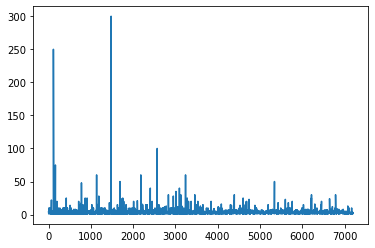

In [42]:
_ = df1["price"][df1["Free/Paid Apps"] == "Paid App"].plot(kind = "line")

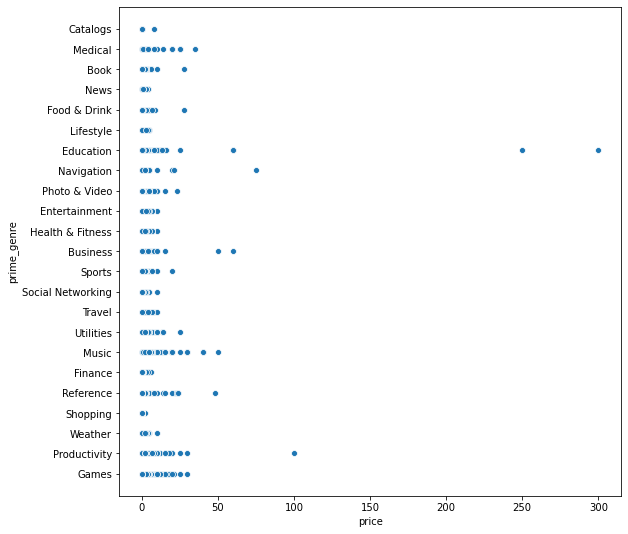

In [43]:
plt.figure(figsize=(9,9))
sns.scatterplot(df1["price"], df1["prime_genre"])

Which Education Genre based Book was priced high and what is the Rating Count?

In [88]:
max_price = df1["price"].quantile(1)
max_price

299.99

In [89]:
df1[["track_name","rating_count_tot","rating_count_ver","user_rating_ver","user_rating"]][df1["price"] == max_price]

,track_name,rating_count_tot,rating_count_ver,user_rating_ver,user_rating
1479,LAMP Words For Life,41,0,0.0,4.0


In [62]:
highest_rated_apps = df1[["track_name","price","user_rating_ver","prime_genre"]][df1["user_rating_ver"] > df1["user_rating_ver"].mean()]
highest_rated_apps

,track_name,price,user_rating_ver,prime_genre
0,PAC-MAN Premium,3.99,4.5,Games
1,Evernote - stay organized,0.00,3.5,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,4.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,4.5,Shopping
4,Bible,0.00,5.0,Reference
...,...,...,...,...
7188,Demolition Derby Virtual Reality (VR) Racing,0.00,4.0,Games
7192,Kubik,0.00,4.5,Games
7193,VR Roller-Coaster,0.00,4.5,Games
7195,VR Roller Coaster World - Virtual Reality,0.00,4.5,Games


# Free Highest Rated Applications

In [63]:
free_high_rated_apps = highest_rated_apps[["track_name","user_rating_ver","prime_genre"]][highest_rated_apps["price"] == 0]
free_high_rated_apps

,track_name,user_rating_ver,prime_genre
1,Evernote - stay organized,3.5,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",4.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.5,Shopping
4,Bible,5.0,Reference
6,PayPal - Send and request money safely,4.5,Finance
...,...,...,...
7188,Demolition Derby Virtual Reality (VR) Racing,4.0,Games
7192,Kubik,4.5,Games
7193,VR Roller-Coaster,4.5,Games
7195,VR Roller Coaster World - Virtual Reality,4.5,Games


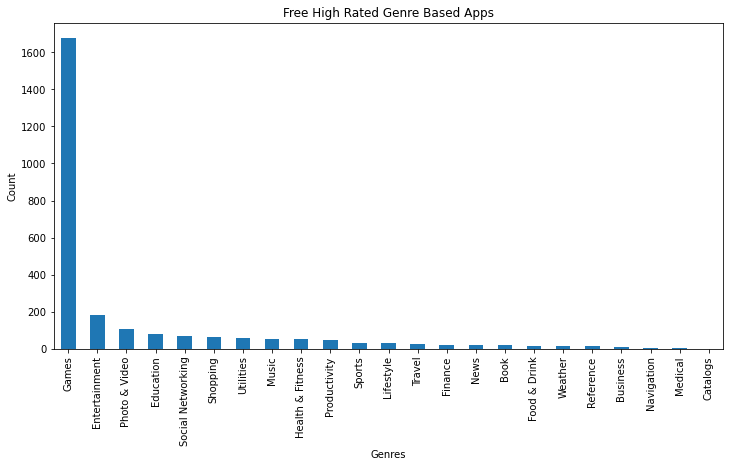

In [78]:
plt.figure(figsize=(12,6))
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Free High Rated Genre Based Apps")
_ = free_high_rated_apps["prime_genre"].value_counts().plot(kind = "bar")

# Paid Highest Rated Applications

In [64]:
paid_high_rated_apps = highest_rated_apps[["track_name","user_rating_ver","prime_genre"]][highest_rated_apps["price"] != 0]
paid_high_rated_apps

,track_name,user_rating_ver,prime_genre
0,PAC-MAN Premium,4.5,Games
5,Shanghai Mahjong,4.0,Games
8,PCalc - The Best Calculator,5.0,Utilities
9,Ms. PAC-MAN,4.0,Games
10,Solitaire by MobilityWare,4.5,Games
...,...,...,...
7159,EMOJIZI BOOBA,4.0,Utilities
7160,Addon Creator Studio for Minecraft PE,4.5,Entertainment
7169,Talking Santa - Video santa claus calls you,3.5,Entertainment
7172,Rescue the Enchanter,4.5,Games


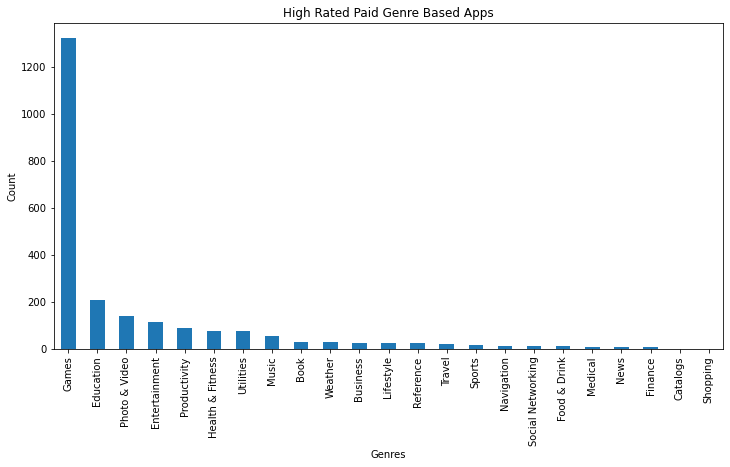

In [79]:
plt.figure(figsize=(12,6))
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("High Rated Paid Genre Based Apps")
_ = paid_high_rated_apps["prime_genre"].value_counts().plot(kind = "bar")

# Insights

According to the above analysis, it is evident that:

1. The, genre: Gaming, Applications present in Apple Store is leading with a drastic number.
2. Entertainment and Education fall far more away, yet, next to Gaming.
3. Amongst the Paid and Free Applications, 80% preferred picking up Free Applications and the rest 20% picked up Paid Applications which are almost equally User Rated.
4. Applications that can be better at operating from Mobiles include biggies like 
    a. Facebook
    b. Google Search Engine for Phone,
    c. Bank of America Mobile Banking.
5. Third Party Apps like are affecting the ratings:
    a. Instagram like (GIFYme, Best 9, WhenToPost)
    b. Facebook like Who Deleted Me?, Pro Editor - Video Maker for FaceBook & Youtube
6. Education genre based book "LAMP Words For Life" has been priced high.